In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# loading data
df = pd.read_csv('data/advertising.csv')

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## checking for linearity

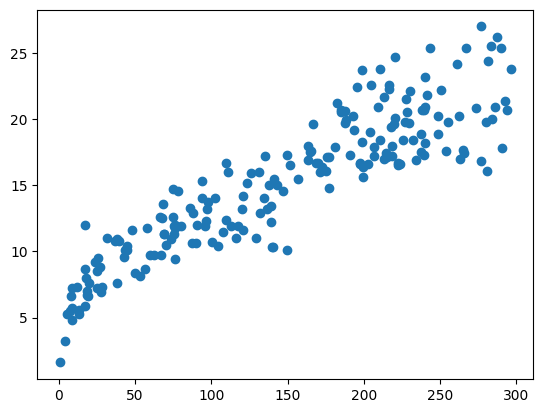

In [11]:
plt.scatter(x=df['TV'], y=df['Sales'])

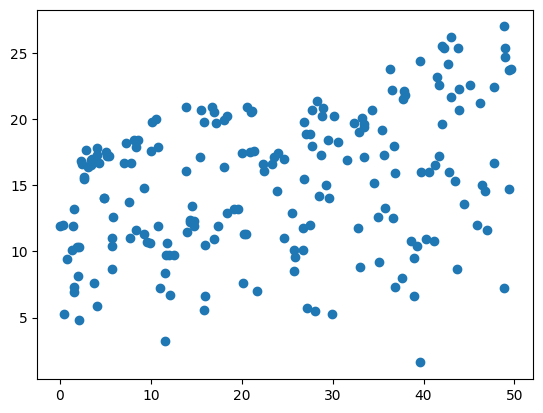

In [9]:
plt.scatter(x=df['Radio'], y=df['Sales'])

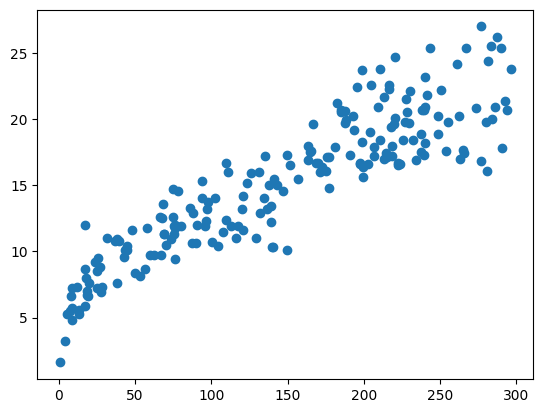

In [10]:
plt.scatter(x=df['TV'], y=df['Sales'])

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2,random_state=42)

In [15]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [16]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

# Applying Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predict = lr.predict(X_test)

In [20]:
y_predict

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

# Checking the accuracy using metrics

In [22]:
from sklearn.metrics import r2_score, mean_absolute_error


In [25]:
# calculating the error
mean_absolute_error(y_test, y_predict)

np.float64(1.2748262109549338)

In [26]:
# calculating the accuracy using r2_score
r2_score(y_test, y_predict)

0.9059011844150826

# Implementation of Linear Regression model to make Sales prediction system
## Predictive System

In [27]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
def sales_predict(tv_budget, radio_budget, newspaper_budget):
    features = np.array([[tv_budget, radio_budget, newspaper_budget]])
    result = lr.predict(features).reshape(1, -1)
    return result[0]

In [32]:
tv_budget = 230.1
radio_budget = 37.8
newspaper_budget = 69.2
sales = sales_predict(230.1, 37.8, 69.2)
sales

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.37254028])

## Saving the model using Pickle library

In [34]:
# we use pickle library to save the model
import pickle

In [39]:
pickle.dump(lr, open('linear_regression.pkl', 'wb'))